## Loading of Stringer evoked

includes some visualizations

In [ ]:
#@title Data retrieval - evoked
import os, requests

fname = "stringer_orientations.npy"
url = "https://osf.io/ny4ut/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [ ]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [ ]:
#@title Data loading
import numpy as np

#@title Data loading
evoked_dat = np.load('stringer_orientations.npy', allow_pickle=True).item()
print(evoked_dat.keys())


dict_keys(['sresp', 'istim', 'stat', 'u_spont', 'v_spont', 'mean_spont', 'std_spont', 'stimtimes', 'frametimes', 'camtimes', 'run', 'info', 'xyz'])


dat has fields:
* dat['sresp']: neurons by stimuli, a.k.a. the neural response data (23589 by 4598). Each 4598 trial is one second and has a specific orientation
* dat['run']: 1 by stimuli, a.k.a. the running speed of the animal in arbitrary units
* dat['istim']: 1 by stimuli, goes from 0 to 2*np.pi, the orientations shown on each trial
* dat['stat']: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.
* dat['stat'][k]['med']: 1 by 2, the position of each neuron k in tissue, in pixels, at a resolution of ~2um/pix. 
* dat['u_spont']: neurons by 128, the weights for the top 128 principal components of spontaneous activity. Unit norm.
* dat['v_spont']: 128 by 910, the timecourses for the top 128 PCs of spont activity.
* dat['u_spont'] @ dat['v_spont']: a reconstruction of the spontaneous activity for 910 timepoints interspersed throughout the recording.


dat has fields:
* `dat['sresp']`: neurons by timebins, a.k.a. the neural response data (14752 by 8118). Timebin = 1.2 sec.
* `dat['run']`: timebins by 1, a.k.a. the running speed of the animal in a.u.
* `dat['xyz']`: three-dimensional position of each neuron in the brain. 
* `dat['pupilArea']`: timebins by 1, see FaceMap for details on the pupil tracker
* `dat['pupilCOM']`: timebins by 2, correspond to X and Y position. See FaceMap for details on the pupil tracker.
* `dat['beh_svd_time']`: timebins by 1,000. Timecourses of behavioral SVDs extracted from face movies. See FaceMap for details. 
* `dat['beh_svd_mask']`: 240 by 320 by 1,000. Spatial masks of behavioral SVDs. Roughly normalized to each other. 
* `dat['beh_svd_mask'] @ dat['beh_svd_time'][T, :]`:  reconstruction of the face movie (its motion energy) for frame T
* `dat['stat']`: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.

# **Process evoked data**

Layer depths: [-450. -425. -400. -375. -350. -325. -300. -275. -250. -225. -200. -175.
 -150.]


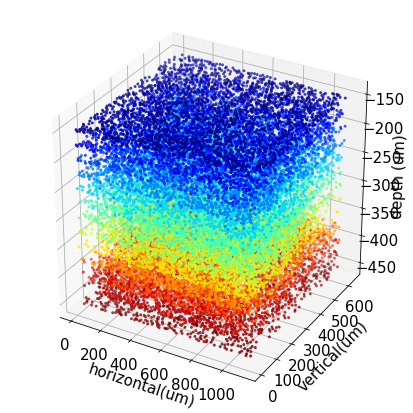

In [ ]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = evoked_dat['xyz']
zunq, iunq = np.unique(z, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1],y[::-1],z[::-1], 'o', s = 4, c = cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');

print('Layer depths:', np.unique(z))

In [ ]:
# ASSIGN LAYER LABELS TO EACH CELL
#L2/3 = 150 - 300
# L4 = 300 - 400
# L5 = 400 - 

abs_z = abs(z)
l2_evoked = np.where(abs_z < 300)[0]
l4_evoked = np.where(np.logical_and(abs_z >= 300, abs_z < 400))[0]
l5_evoked = np.where(abs_z >= 400)[0]

evoked_labels = np.zeros(z.shape[0])
evoked_labels[l2_evoked] = 2
evoked_labels[l4_evoked] = 4
evoked_labels[l5_evoked] = 5

In [ ]:
l2_evoked_sample = np.random.choice(l2_evoked, len(l5_evoked))
l4_evoked_sample = np.random.choice(l4_evoked, len(l5_evoked))

evoked_labels_sample = np.zeros(z.shape[0])
evoked_labels_sample[l2_evoked_sample] = 2
evoked_labels_sample[l4_evoked_sample] = 4
evoked_labels_sample[l5_evoked] = 5

In [ ]:
l2 = evoked_dat['sresp'][l2_evoked]
l4 = evoked_dat['sresp'][l4_evoked]
l5 = evoked_dat['sresp'][l5_evoked]

l2_sample = evoked_dat['sresp'][l2_evoked_sample]
l4_sample = evoked_dat['sresp'][l4_evoked_sample]

-150.0
-150.0
-150.0


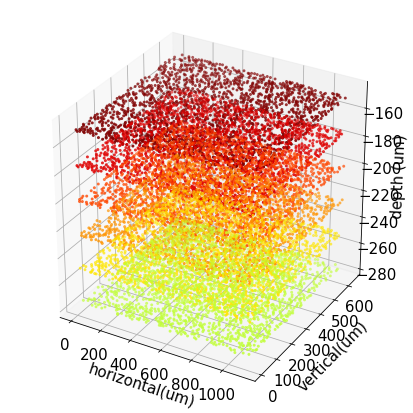

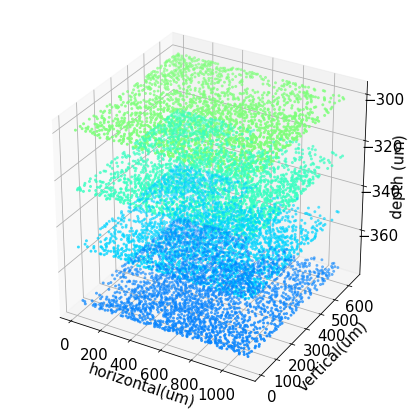

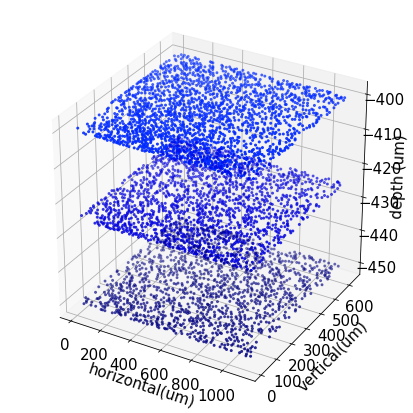

In [ ]:
# @title plot the 3D positions of all neurons
label_vec = [2,4, 5]
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
for i in label_vec:
  x, y, z = evoked_dat['xyz']
  print(np.max(z))
  zunq, iunq = np.unique(z, return_inverse=True)
  xc = np.linspace(0.0, 1.0, len(zunq))
  cmap = cm.get_cmap('jet')(xc)

  fig = plt.figure(figsize=(6,6))
  ax = fig.add_subplot(111, projection='3d')
  current_layer = np.where(evoked_labels == i)[0]
  ax.scatter(x[current_layer],y[current_layer],z[current_layer], 'o', s = 4, c = cmap[iunq][current_layer])
  ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');

# Color code and plot orientation selectivity of cells

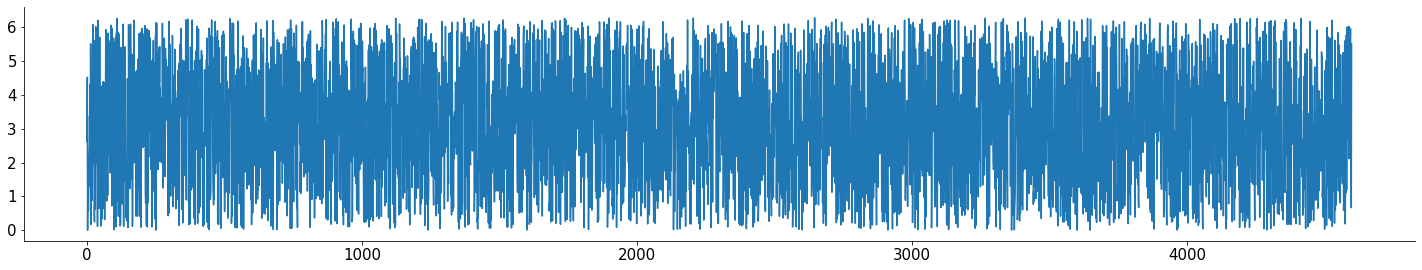

In [ ]:
plt.plot(evoked_dat['istim'])

# **Orientation selectivity**



In [ ]:
stim = evoked_dat['istim']
resp = evoked_dat['sresp']

In [ ]:
orientations = np.linspace(0, (2*np.pi), 21)[0:-1] # 20 stimuli bins, 18 degrees apar
stim_binned = stim.copy()

for i in range(len(stim_binned)):
  stim_binned[i] = orientations[np.argmin(abs(stim_binned[i] - orientations))] # Makes array of shape (stimuli, ), but with binned orientation values

stim_binned.shape

(4598,)

In [ ]:
stim_frames = np.zeros((resp.shape[0], len(orientations)))

for i in range(len(orientations)):  
  stim_frames[:,i] = resp[:,np.where(stim_binned == orientations[i])[0]].mean(axis = 1) # Calculate mean response for each cell and orientation

stim_frames.shape

pref_idx = np.argmax(stim_frames, axis = 1)
nonpref_idx = pref_idx - 5
print('Preferred orientation Index:', nonpref_idx)
print('Orthogonal, nonpreferred orientation Index:', nonpref_idx)

In [ ]:
# Define orientation selectivity index (OSI) for every cell

osi = np.zeros(resp.shape[0])
ori_sel = np.zeros(resp.shape[0])

for i in range(resp.shape[0]):
  mu_max = stim_frames[i, pref_idx[i]]
  mu_orth = stim_frames[i, nonpref_idx[i]]

  osi[i] = (mu_max - mu_orth) / (mu_max + mu_orth)

  if osi[i] >= 0.3:
    ori_sel[i] = orientations[pref_idx[i]]
  else: 
    ori_sel[i] = np.nan

ori_sel.shape   # Array of shape (cells, ) with orentation selectivity (or NaN)

In [ ]:
# Number of not orientation selective cells
np.sum(np.isnan(ori_sel))

3024

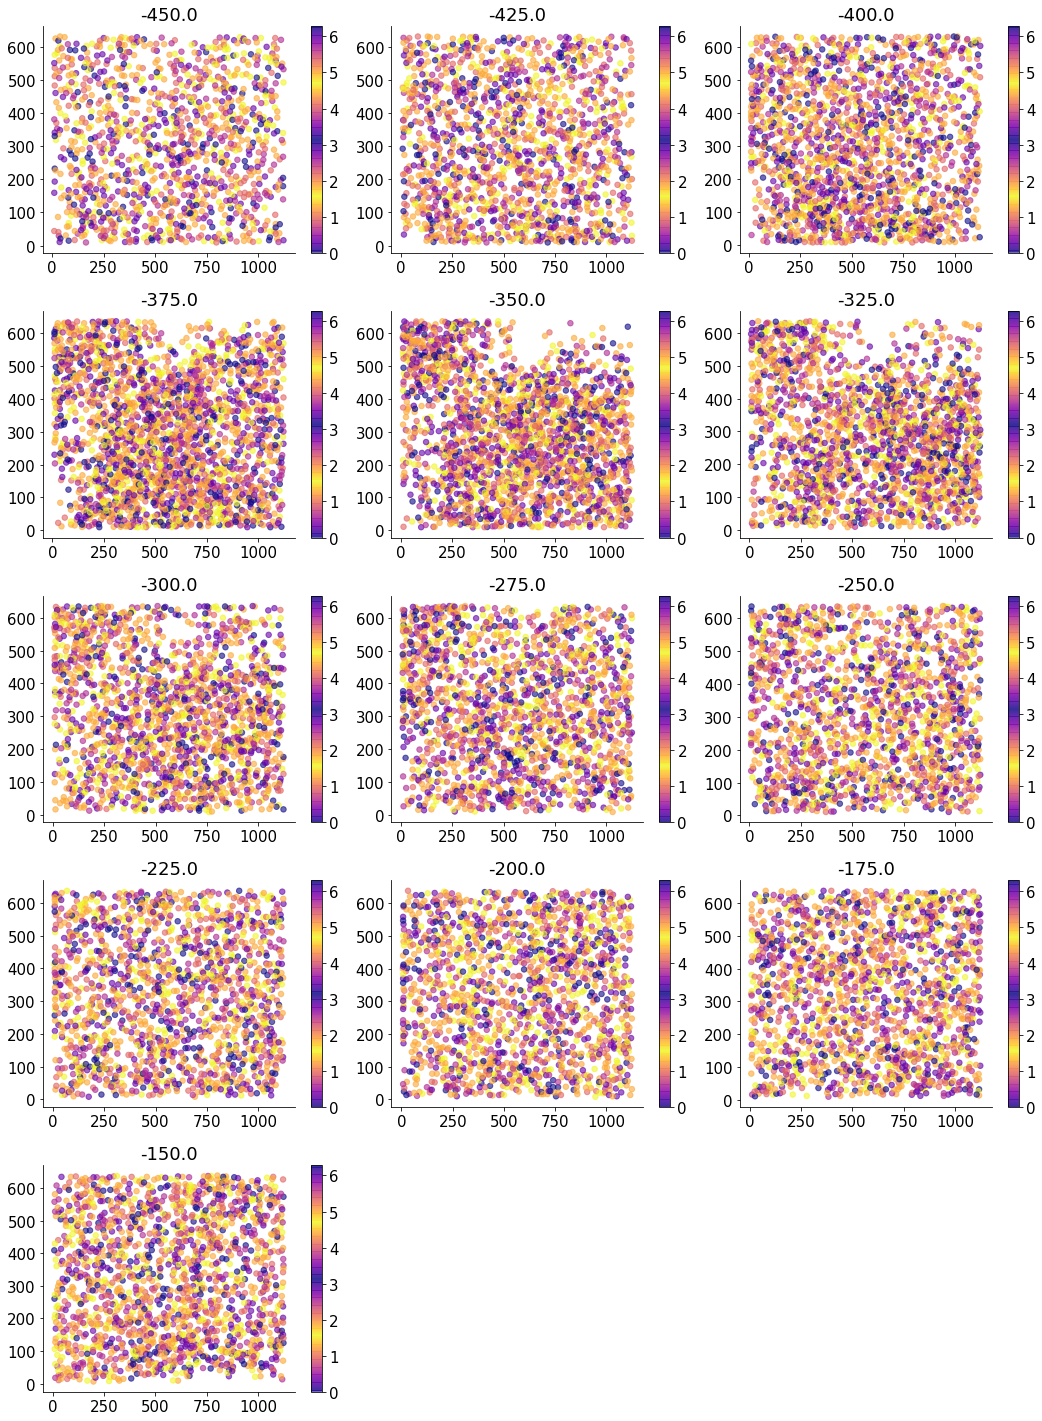

In [ ]:
# Plot cells in all layers, color coded by orientation selectivity
plt.figure(figsize=(15,20))

for i, zi in enumerate(np.unique(z)):
  pl = evoked_dat['sresp'][np.where(z==zi)]
  x_pl, y_pl, z_pl = evoked_dat['xyz'][:,np.where(z==zi)]

  ori_select = ori_sel[np.argmax(pl, axis=1)]

  plt.subplot(5,3,i+1)
  plt.scatter(x_pl[::-1],y_pl[::-1],c=ori_select, cmap=newcmp, vmin = 0, vmax=2*np.pi, alpha = 0.6, s=30)
  plt.title(zi)
  plt.colorbar()

# Split up data into test and train, using sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [ ]:
# For logistic regression, replace radian values in stim_binned with integers between 0 and 19
orientations = np.linspace(0, (2*np.pi), 21)[0:-1]
stim_int = np.arange(0,20)
stim_binned_int = stim_binned

for j,i in enumerate (orientations):
  stim_binned_int[np.where(stim_binned == i)] = stim_int[j]

stim_binned_int = stim_binned_int.astype(int)
stim_binned_int

array([ 8, 14,  0, ...,  9,  2, 18])

In [ ]:
X = resp.T
y = stim_binned_int

In [ ]:
X.shape

(4598, 23589)

In [ ]:
y.shape

(4598,)

## Logistic Regression

In [ ]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
X_scaled = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=0)

In [ ]:
X_test

array([[-0.05436044, -0.3777936 , -0.11361342, ..., -0.60834845,
         0.1794379 , -0.05241098],
       [-0.3466067 , -0.3777936 ,  0.1838328 , ..., -0.25767424,
        -0.55374673,  0.07228866],
       [-0.3466067 , -0.3777936 , -0.25910829, ...,  0.2022276 ,
         1.18348234, -0.35105948],
       ...,
       [-0.3466067 , -0.3777936 ,  0.10461389, ..., -0.60834845,
        -0.55374673, -0.39212856],
       [-0.34150218, -0.10599801, -0.25910829, ..., -0.60834845,
         0.84874381,  0.66804025],
       [ 0.07558386, -0.3777936 , -0.25910829, ..., -0.60834845,
         1.69384605, -0.39212856]])

In [ ]:
reg = LogisticRegression(penalty = 'l2', C = 1, fit_intercept = True, multi_class = 'multinomial', max_iter=500).fit(X_train, y_train)

In [ ]:
pred = reg.predict(X_test)
score = reg.score(X_test, y_test)
score

0.8945652173913043

# Logistic Regression per layer

### Layer 2/3

In [ ]:
# Layer 2
# X = l2.T
# y = stim_binned_int

# #X_scaled = preprocessing.scale(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# reg = LogisticRegression(multi_class = 'multinomial', max_iter=10).fit(X_train, y_train)

# pred = reg.predict(X_test)
# score = reg.score(X_test, y_test)
# score

In [ ]:
# Layer 2
X = l2.T
y = stim_binned_int

accuracies_l2 = cross_val_score(LogisticRegression(multi_class = 'multinomial', max_iter=10), X, y, cv=15) # k=5 crossvalidation
accuracies_l2

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


KeyboardInterrupt: ignored

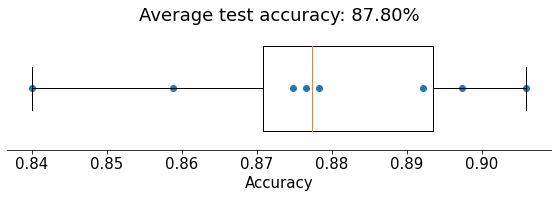

In [ ]:
#@title
#@markdown Run to plot out these `k=8` accuracy scores.
f, ax = plt.subplots(figsize=(8, 3))
ax.boxplot(accuracies_l2, vert=False, widths=.7)
ax.scatter(accuracies_l2, np.ones(8))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {accuracies.mean():.2%}"
)
ax.spines["left"].set_visible(False)

### Layer 4

In [ ]:
# # Layer 4
# X = l4.T
# y = stim_binned_int

# #X_scaled = preprocessing.scale(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


# reg = LogisticRegression(penalty = 'l2', fit_intercept = True, multi_class = 'multinomial', max_iter=10).fit(X_train, y_train)

# pred = reg.predict(X_test)
# score = reg.score(X_test, y_test)
# score

In [ ]:
X = l4.T
y = stim_binned_int

accuracies_l4 = cross_val_score(LogisticRegression(multi_class = 'multinomial', max_iter=10), X, y, cv=15) # k=5 crossvalidation
accuracies_l4

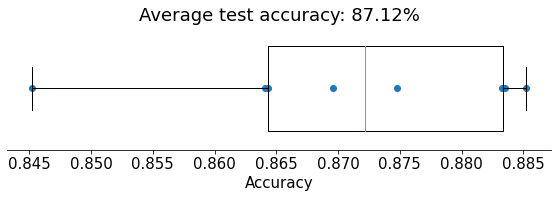

In [ ]:
#@title
#@markdown Run to plot out these `k=8` accuracy scores.
f, ax = plt.subplots(figsize=(8, 3))
ax.boxplot(accuracies, vert=False, widths=.7)
ax.scatter(accuracies, np.ones(15))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {accuracies.mean():.2%}"
)
ax.spines["left"].set_visible(False)

### Layer 5

In [ ]:
# Layer 5
# X = l5.T
# y = stim_binned_int

# X_scaled = preprocessing.scale(X)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=0)

# reg = LogisticRegression(penalty = 'l2', fit_intercept = True, multi_class = 'multinomial', max_iter=10).fit(X_train, y_train)

# pred = reg.predict(X_test)
# score = reg.score(X_test, y_test)
# score

In [ ]:
X = l5.T
y = stim_binned_int

accuracies = cross_val_score(LogisticRegression(multi_class = 'multinomial', max_iter=10), X, y, cv=15) # k=5 crossvalidation
accuracies

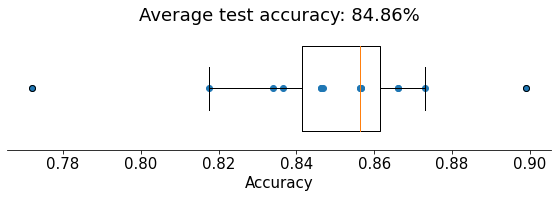

In [ ]:
#@title
#@markdown Run to plot out these `k=8` accuracy scores.
f, ax = plt.subplots(figsize=(8, 3))
ax.boxplot(accuracies, vert=False, widths=.7)
ax.scatter(accuracies, np.ones(15))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {accuracies.mean():.2%}"
)
ax.spines["left"].set_visible(False)

# Combine logistic regressions with crossvalidation
## Using 20 binned stimuli

In [ ]:
orientations_20 = np.linspace(0, (2*np.pi), 21)[0:-1] # 20 stimuli bins, 18 degrees apar
stim_binned_20 = stim.copy()

for i in range(len(stim_binned)):
  stim_binned_20[i] = orientations_20[np.argmin(abs(stim_binned_20[i] - orientations_20))] # Makes array of shape (stimuli, ), but with binned orientation values

np.unique(stim_binned_20).shape

(20,)

In [ ]:
# For logistic regression, replace radian values in stim_binned with integers between 0 and 19
stim_int_20 = np.arange(0,20)
stim_binned_int_20 = stim_binned_20

for j,i in enumerate (orientations_20):
  stim_binned_int_20[np.where(stim_binned_20 == i)] = stim_int_20[j]

stim_binned_int_20 = stim_binned_int_20.astype(int)
np.unique(stim_binned_int_20).shape

(20,)

In [ ]:
X_l2 = l2.T
X_l4 = l4.T
X_l5 = l5.T

y = stim_binned_int_20

cv = 5

accuracies_l2_20 = cross_val_score(LogisticRegression(multi_class = 'multinomial', max_iter=10), X_l2, y, cv=cv) 
accuracies_l4_20 = cross_val_score(LogisticRegression(multi_class = 'multinomial', max_iter=10), X_l4, y, cv=cv) 
accuracies_l5_20 = cross_val_score(LogisticRegression(multi_class = 'multinomial', max_iter=10), X_l5, y, cv=cv) # k=5 crossvalidation


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracies L2: [0.84347826 0.88695652 0.89782609 0.8835691  0.85963003] Accuracies L4: [0.85434783 0.87717391 0.89130435 0.87051143 0.85527748] Accuracies L5 [0.81956522 0.85326087 0.85978261 0.84657236 0.85636561]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('Accuracies L2:', accuracies_l2_20, 'Accuracies L4:', accuracies_l4_20, 'Accuracies L5', accuracies_l5_20)

Accuracies L2: [0.84347826 0.88695652 0.89782609 0.8835691  0.85963003] Accuracies L4: [0.85434783 0.87717391 0.89130435 0.87051143 0.85527748] Accuracies L5 [0.81956522 0.85326087 0.85978261 0.84657236 0.85636561]


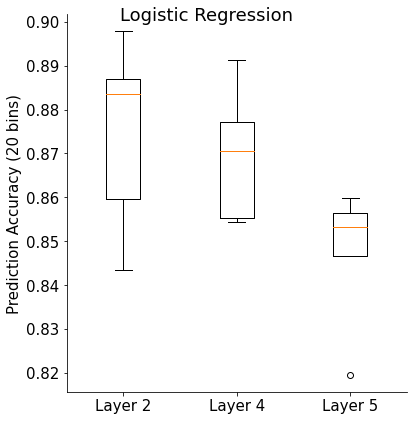

In [ ]:
to_plot_20 = [accuracies_l2_20, accuracies_l4_20, accuracies_l5_20]
fig = plt.figure(figsize=(6,6))
fig.suptitle('Logistic Regression')
ax = fig.add_subplot(111)
ax.boxplot(to_plot_20)
ax.set_xticklabels(['Layer 2', 'Layer 4', 'Layer 5'])
ax.set_ylabel('Prediction Accuracy (20 bins)')
plt.show()

# Redo for 60 orientation bins

In [ ]:
orientations_60 = np.linspace(0, (2*np.pi), 61)[0:-1] # 20 stimuli bins, 18 degrees apar
stim_binned_60 = stim.copy()

for i in range(len(stim_binned)):
  stim_binned_60[i] = orientations_60[np.argmin(abs(stim_binned_60[i] - orientations_60))] # Makes array of shape (stimuli, ), but with binned orientation values

np.unique(stim_binned_60).shape

(60,)

In [ ]:
# For logistic regression, replace radian values in stim_binned with integers between 0 and 19
stim_int_60 = np.arange(0,60)
stim_binned_int_60 = stim_binned_60

for j,i in enumerate (orientations_60):
  stim_binned_int_60[np.where(stim_binned_60 == i)] = stim_int_60[j]

stim_binned_int_60 = stim_binned_int_60.astype(int)
np.unique(stim_binned_int_60).shape

(60,)

In [ ]:
X_l2 = l2.T
X_l4 = l4.T
X_l5 = l5.T

y = stim_binned_int_60

cv = 5

accuracies_l2_60 = cross_val_score(LogisticRegression(multi_class = 'multinomial', max_iter=10), X_l2, y, cv=cv) 
accuracies_l4_60 = cross_val_score(LogisticRegression(multi_class = 'multinomial', max_iter=10), X_l4, y, cv=cv) 
accuracies_l5_60 = cross_val_score(LogisticRegression(multi_class = 'multinomial', max_iter=10), X_l5, y, cv=cv) # k=5 crossvalidation

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print('Accuracies L2:', accuracies_l2_60, 'Accuracies L4:', accuracies_l4_60, 'Accuracies L5', accuracies_l5_60)

Accuracies L2: [0.55652174 0.60869565 0.62065217 0.59085963 0.57018498] Accuracies L4: [0.53043478 0.55652174 0.57826087 0.58106638 0.55386289] Accuracies L5 [0.47717391 0.53695652 0.5326087  0.52774755 0.49945593]


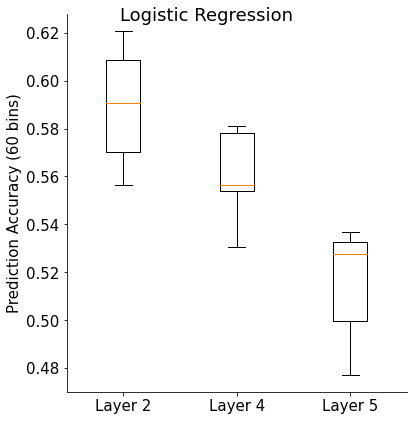

In [ ]:
to_plot_60 = [accuracies_l2_60, accuracies_l4_60, accuracies_l5_60]
fig = plt.figure(figsize=(6,6))
fig.suptitle('Logistic Regression')
ax = fig.add_subplot(111)
ax.boxplot(to_plot_60)
ax.set_xticklabels(['Layer 2', 'Layer 4', 'Layer 5'])
ax.set_ylabel('Prediction Accuracy (60 bins)')
plt.show()

In [ ]:
# All in one plot

A= [accuracies_l2_20,  accuracies_l2_60]
B = [accuracies_l4_20, accuracies_l4_60]
C = [accuracies_l5_20, accuracies_l5_60]

fig = figure(figsize=(6,6))
ax = axes()

# first boxplot pair
bp = boxplot(A, positions = [1, 2], widths = 0.6)

# second boxplot pair
bp = boxplot(B, positions = [4, 5], widths = 0.6)

# thrid boxplot pair
bp = boxplot(C, positions = [7, 8], widths = 0.6)

# set axes limits and labels
ylim(0.4,1)
ax.set_xticklabels(['layer2', 'layer4', 'layer5'])
ax.set_xticks([1.5, 4.5, 7.5])
show()

NameError: ignored

In [ ]:
l2.shape

(10491, 4598)

# **Redo logistic regression for PCs**

In [ ]:
from scipy.stats import zscore
from sklearn.decomposition import PCA

In [ ]:
l2_pca = PCA()
l2_pca.fit(l2.T)

l4_pca = PCA()
l4_pca.fit(l4.T)

l5_pca = PCA()
l5_pca.fit(l5.T)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
l2_sample_pca = PCA()
l2_sample_pca.fit(l2_sample.T)

l4_sample_pca = PCA()
l4_sample_pca.fit(l4_sample.T)

l5_pca = PCA()
l5_pca.fit(l5.T)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

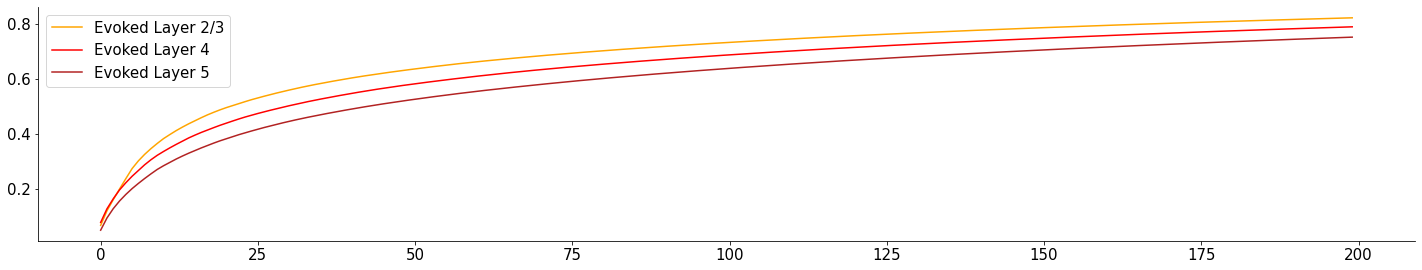

In [ ]:
l2_explained_variance = np.cumsum(l2_sample_pca.explained_variance_ratio_)
l4_explained_variance = np.cumsum(l4_sample_pca.explained_variance_ratio_)
l5_explained_variance = np.cumsum(l5_pca.explained_variance_ratio_)

plt.plot(l2_explained_variance[:200], label='Evoked Layer 2/3', linestyle = '-', c = 'orange')
plt.plot(l4_explained_variance[:200], label='Evoked Layer 4',linestyle = '-', c = 'red')
plt.plot(l5_explained_variance[:200], label='Evoked Layer 5',linestyle = '-', c = 'firebrick')
plt.legend()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [ ]:
thresh = 0.8
l2_ncomp = np.where(l2_explained_variance > thresh)[0][0]
l4_ncomp = np.where(l4_explained_variance > thresh)[0][0]
l5_ncomp = np.where(l5_explained_variance > thresh)[0][0]
print('layer 2 =' + str(l2_ncomp),'layer 4 =' + str(l4_ncomp),'layer 5 =' + str(l5_ncomp))

layer 2 =165 layer 4 =212 layer 5 =266


In [ ]:
l2_sample_pca = PCA(n_components = l2_ncomp)
l2_sample_pca.fit(l2_sample.T)
l4_sample_pca = PCA(n_components = l4_ncomp)
l4_sample_pca.fit(l4_sample.T)
l5_pca = PCA(n_components = l5_ncomp)
l5_pca.fit(l5.T)

l2_trans = l2_sample_pca.fit_transform(l2_sample.T)
l4_trans = l4_sample_pca.fit_transform(l4_sample.T)
l5_trans = l5_pca.fit_transform(l5.T)

In [ ]:
#Layer 2
stim = evoked_dat['istim']
resp = evoked_dat['sresp']

X = preprocessing.scale(l2_trans)
y = stim_binned_int_60
accuracies_l2_60 = cross_val_score(LogisticRegression(multi_class = 'multinomial', max_iter=10), X, y, cv=cv) 


print("Accuracy: %0.2f (+/- %0.2f)" % (accuracies_l2_60.mean(), accuracies_l2_60.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.51 (+/- 0.06)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Layer 4
stim = evoked_dat['istim']
resp = evoked_dat['sresp']
X = preprocessing.scale(l4_trans)
y = stim_binned_int_60


accuracies_l4_60 = cross_val_score(LogisticRegression(multi_class = 'multinomial', max_iter=10), X, y, cv=cv) 
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracies_l2_60.mean(), accuracies_l2_60.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.51 (+/- 0.06)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Layer 5
stim = evoked_dat['istim']
resp = evoked_dat['sresp']
X = preprocessing.scale(l5_trans)
y = stim_binned_int_60

accuracies_l5_60 = cross_val_score(LogisticRegression(multi_class = 'multinomial', max_iter=10), X, y, cv=cv) 
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracies_l5_60.mean(), accuracies_l5_60.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.47 (+/- 0.04)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
accuracies_l2_60 = np.abs(accuracies_l2_60)
accuracies_l4_60 = np.abs(accuracies_l4_60)
accuracies_l5_60 = np.abs(accuracies_l5_60)


outcome = [accuracies_l2_60, accuracies_l4_60, accuracies_l5_60]



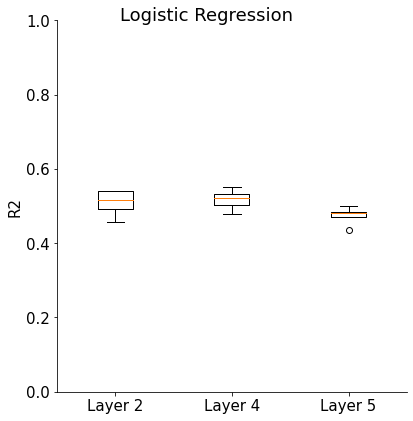

In [ ]:
fig = plt.figure(figsize=(6,6))
fig.suptitle('Logistic Regression')
ax = fig.add_subplot(111)
ax.boxplot(outcome)
ax.set_xticklabels(['Layer 2', 'Layer 4', 'Layer 5'])
ax.set_ylabel('R2')
ax.set_ylim(0,1)
plt.show()

In [ ]:
slide = np.linspace(0.5,0.9,10)
l2_dict = {}
l4_dict = {}
l5_dict = {}
dict_list = l2_dict, l4_dict, l5_dict

for current_thresh in slide:
  l2_ncomp = np.where(l2_explained_variance > current_thresh)[0][0]
  l4_ncomp = np.where(l4_explained_variance > current_thresh)[0][0]
  l5_ncomp = np.where(l5_explained_variance > current_thresh)[0][0]

  l2_sample_pca = PCA(n_components = l2_ncomp)
  l2_sample_pca.fit(l2_sample.T)
  l4_sample_pca = PCA(n_components = l4_ncomp)
  l4_sample_pca.fit(l4_sample.T)
  l5_pca = PCA(n_components = l5_ncomp)
  l5_pca.fit(l5.T)
  pca_list = [l2_sample_pca, l4_sample_pca, l5_pca]
  data_list = [l2_sample, l4_sample, l5]

  for f in range(len(pca_list)):  
    X = preprocessing.scale(pca_list[f].fit_transform(data_list[f].T))
    y = stim_binned_int_60

    output = {str(current_thresh): cross_val_score(LogisticRegression(multi_class = 'multinomial', max_iter=10), X, y, cv=cv)} 
    dict_list[f].update(output)
    print('Done ' + str(f) + 'of ' + str(current_thresh) )


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.5444444444444444


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.5444444444444444


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.5444444444444444


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.5888888888888889


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.5888888888888889


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.5888888888888889


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.6333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.6333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.6333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.6777777777777778


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.6777777777777778


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.6777777777777778


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.7222222222222222


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.7222222222222222


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.7222222222222222


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.7666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.7666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.7666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.8111111111111111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.8111111111111111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.8111111111111111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.8555555555555556


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.8555555555555556


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.8555555555555556


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 0of 0.9


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 1of 0.9


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 2of 0.9


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Plot
l2_current = []
pc_label = []
for i in slide:
  l2_current = np.append(l2_current, np.abs(l2_dict[str(i)]))
  for e in range(5):
    pc_label = np.append(pc_label, str(round(i,3)))

    

l4_current = []
for i in slide:
  l4_current = np.append(l4_current, np.abs(l4_dict[str(i)]))

l5_current = []
for i in slide:
  l5_current = np.append(l5_current, np.abs(l5_dict[str(i)]))

import pandas as pd
l2_df = pd.DataFrame( {"r2": l2_current, "PC variance": pc_label } )
l4_df = pd.DataFrame( {"r2": l4_current, "PC variance": pc_label } )
l5_df = pd.DataFrame( {"r2": l5_current, "PC variance": pc_label } )

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:829: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing

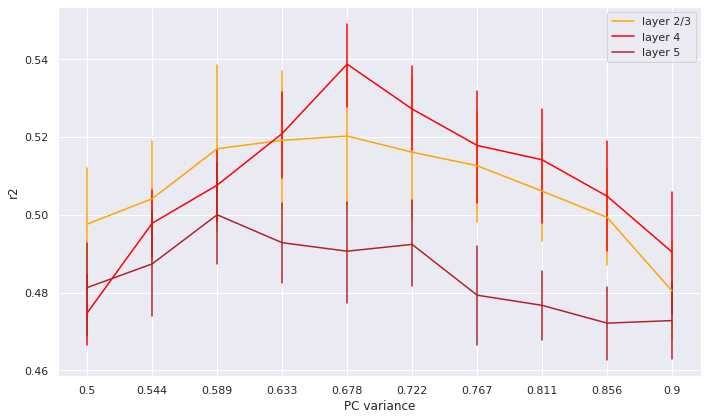

In [ ]:
fig = plt.figure(figsize=(10,6))
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="PC variance", y="r2", data=l2_df, c = 'orange', label = 'layer 2/3', err_style = 'bars', ci = 68)
ax = sns.lineplot(x="PC variance", y="r2", data=l4_df, c = 'red' , label = 'layer 4', err_style = 'bars', ci = 68)
ax = sns.lineplot(x="PC variance", y="r2", data=l5_df, c = 'firebrick', label = 'layer 5', err_style = 'bars', ci = 68)
ax.set_ylabel('r2')
plt.legend()
plt.show()
